<a href="https://colab.research.google.com/github/DikshantPatel2210/TimeSeries_Forecasting_LSTM_DailyDelhiClimate/blob/main/TimeSeries_Forecasting_LSTM_DailyDelhiClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv",index_col= 'date', parse_dates= True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
#df["date"] = pd.to_datetime(df["date"])
#df.set_index('date', inplace = True)

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [ ]:
df = df.asfreq(freq = "D" )

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq='D')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


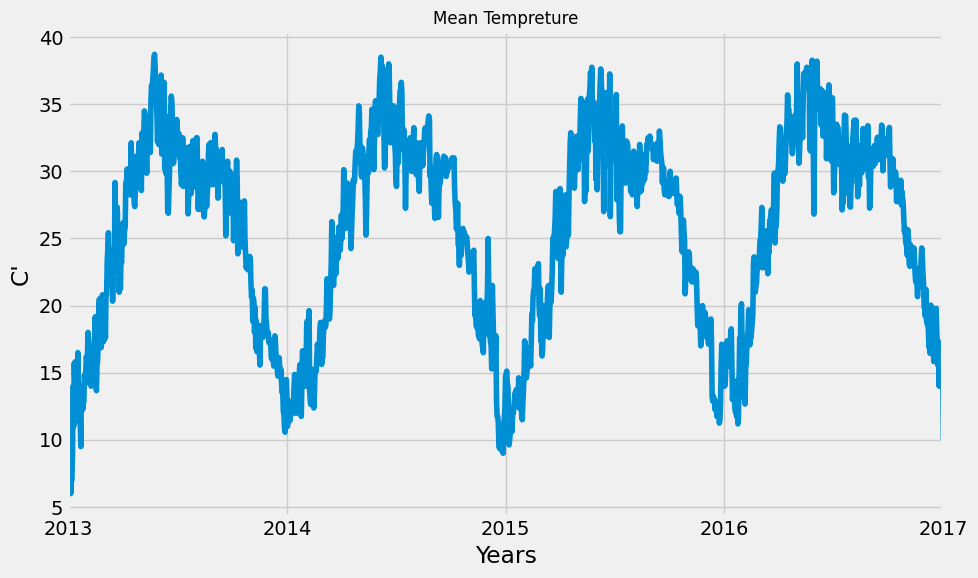

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Mean Tempreture", fontsize = 12)
df["meantemp"].plot()
plt.xlabel("Years")
plt.ylabel("C'")
plt.tight_layout()
plt.show()

##Data Preprocessing

In [ ]:
n_cols = 1
dataset = df["meantemp"]
dataset = pd.DataFrame(dataset)
dataset

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:
data = dataset.values
data

array([[10.        ],
       [ 7.4       ],
       [ 7.16666667],
       ...,
       [14.0952381 ],
       [15.05263158],
       [10.        ]])

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       ...,
       [0.24745269],
       [0.276718  ],
       [0.12227074]])

In [ ]:
len(scaled_data)

1462

##Splitting

In [ ]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
train_size , test_size

(1096, 366)

#Creating training set

In [ ]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1
for  i  in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i,:])
    y_train.append(scaled_data[i])


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
y_train

array([[0.39737991],
       [0.40756914],
       [0.35458515],
       ...,
       [0.24745269],
       [0.276718  ],
       [0.12227074]])

In [ ]:
x_train.shape, y_train.shape

((1402, 60, 1), (1402, 1))

#LSML Model

In [ ]:
model = Sequential([
    LSTM(50,input_shape = (x_train.shape[1], n_cols), return_sequences= True),
    LSTM(64, return_sequences = False),
    Dense(32),
    Dense(16),
    Dense(n_cols),
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.1019 - mean_absolute_error: 0.2263
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0070 - mean_absolute_error: 0.0675
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0052 - mean_absolute_error: 0.0570
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0048 - mean_absolute_error: 0.0550
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0047 - mean_absolute_error: 0.0539
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0048 - mean_absolute_error: 0.0543
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0041 - mean_absolute_error: 0.0509
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0043 - mean_absolute_error: 0.0518
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0043 - mean_absolute_error: 0.0512
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0048 - mean_absolute_error: 0.0545
Epoch 11/100
44/44 ━━━━━━━━━━

In [ ]:
mas = history.history["mean_absolute_error"]

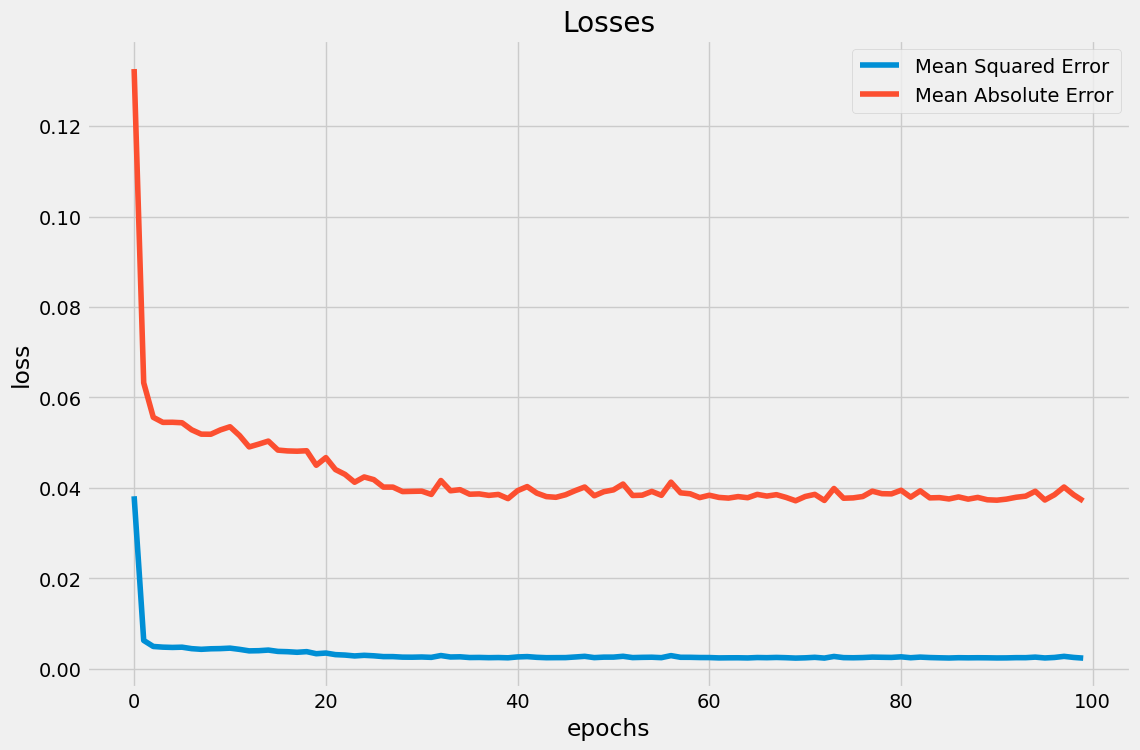

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#Prediction:

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [ ]:
predictions.shape

(366, 1)

In [ ]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(366, 1)

In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [ ]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.36

In [ ]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,14.691157,14.000000
1,14.195678,14.375000
2,14.313278,15.750000
3,15.253907,15.833333
4,15.576785,17.375000
...,...,...
361,16.814068,17.217391
362,17.059835,15.238095
363,15.783146,14.095238
364,14.697386,15.052632


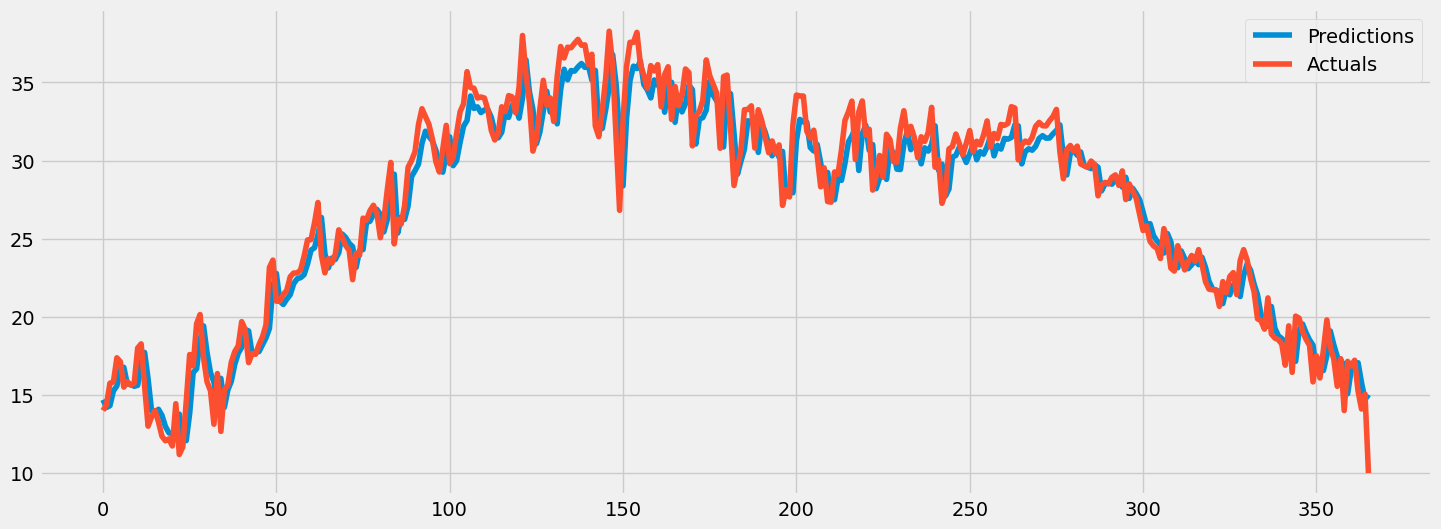

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

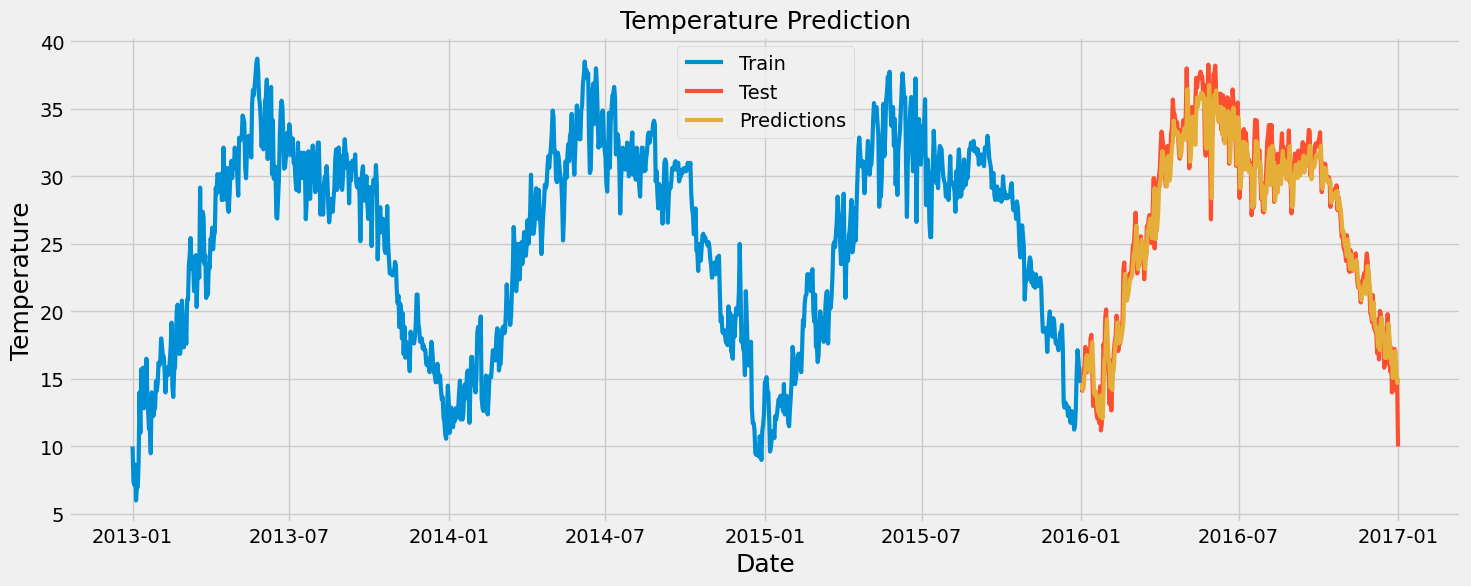

In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['meantemp'], linewidth= 3)
plt.plot(test['meantemp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariante Prediction

In [ ]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
n_COLS = 4
cols = list(df.iloc[:,0:5])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(1462, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1096, 4)

In [ ]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 4

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])

In [ ]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((1036, 60, 4), (1036, 4))

In [ ]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [ ]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,116 (168.42 KB)

 Trainable params: 43,116 (168.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0908 - mean_absolute_error: 0.2113
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0100 - mean_absolute_error: 0.0740
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0081 - mean_absolute_error: 0.0623
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0084 - mean_absolute_error: 0.0601
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0075 - mean_absolute_error: 0.0582
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0074 - mean_absolute_error: 0.0579
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0070 - mean_absolute_error: 0.0563
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0074 - mean_absolute_error: 0.0579
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0071 - mean_absolute_error: 0.0576
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0079 - mean_absolute_error: 0.0586
Epoch 11/100
33/33 ━━━━━━━━━━

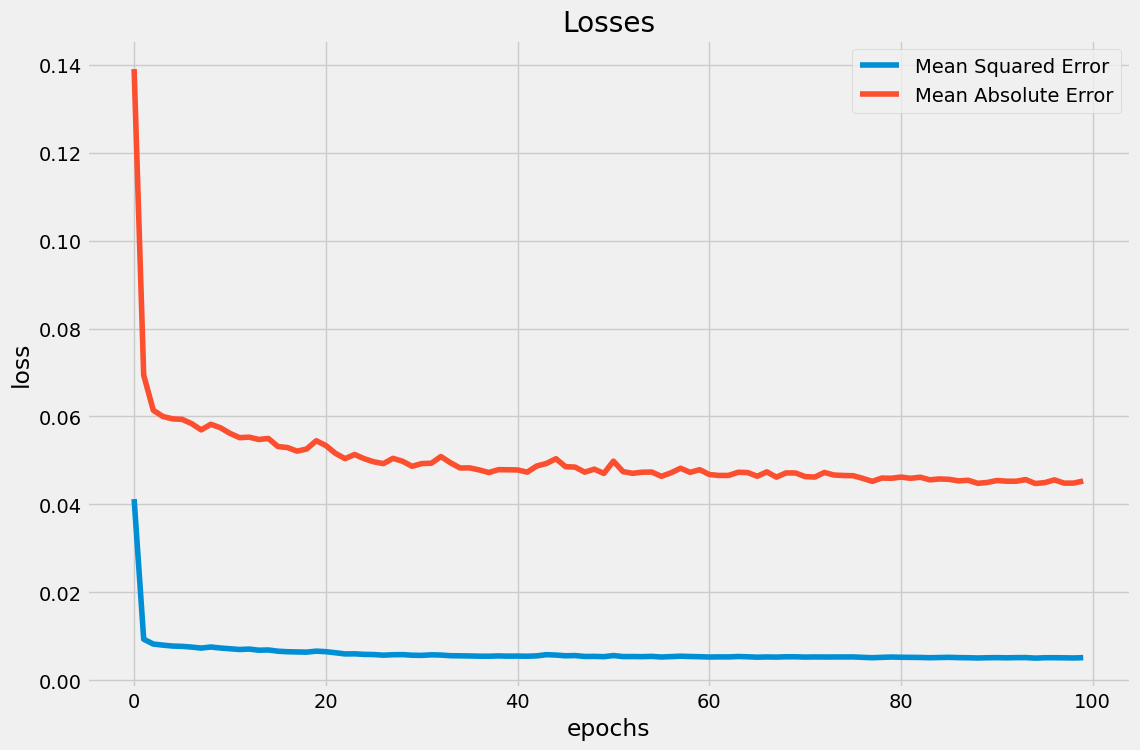

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 4

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
x_test.shape , y_test.shape


((366, 60, 4), (366, 4))

In [ ]:

predictions = model2.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [ ]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

277.79

In [ ]:
from datetime import timedelta

In [ ]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [ ]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model2.predict(Xin, batch_size=5)
    forcast.append(out[0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[array([0.30383334, 0.7614729 , 0.09484836, 0.1423884 ], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[array([0.30383334, 0.7614729 , 0.09484836, 0.1423884 ], dtype=float32), array([0.32890385, 0.3980436 , 0.20570393, 0.14261495], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[array([0.30383334, 0.7614729 , 0.09484836, 0.1423884 ], dtype=float32), array([0.32890385, 0.3980436 , 0.20570393, 0.14261495], dtype=float32), array([0.30776986, 0.48401448, 0.17094012, 0.13985993], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[array([0.30383334, 0.7614729 , 0.09484836, 0.1423884 ], dtype=float32), array([0.32890385, 0.3980436 , 0.20570393, 0.14261495], dtype=float32), array([0.30776986, 0.48401448, 0.17094012, 0.13985993], dtype=float32), array([0.31188807, 0.44791755, 0.17135511, 0.13848194], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[array([0.30383334, 0.7614729 , 0.09484836, 0.1423884 ], dtype=float32), array([0.3289

In [ ]:

forcasted_output = np.asanyarray(forcast)
forcasted_output = scaler.inverse_transform(forcasted_output)

In [ ]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", 'meantemp', 'humidity', 'wind_speed', 'meanpressure'
df_result.head()

,Date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.939691,79.350365,4.004498,1090.839478
1,2017-01-02,16.759855,47.887775,8.684820,1092.579834
2,2017-01-03,16.068472,55.330399,7.217092,1071.414795
3,2017-01-04,16.203196,52.205433,7.234613,1060.828613
4,2017-01-05,16.268583,51.771969,6.873323,1059.320312


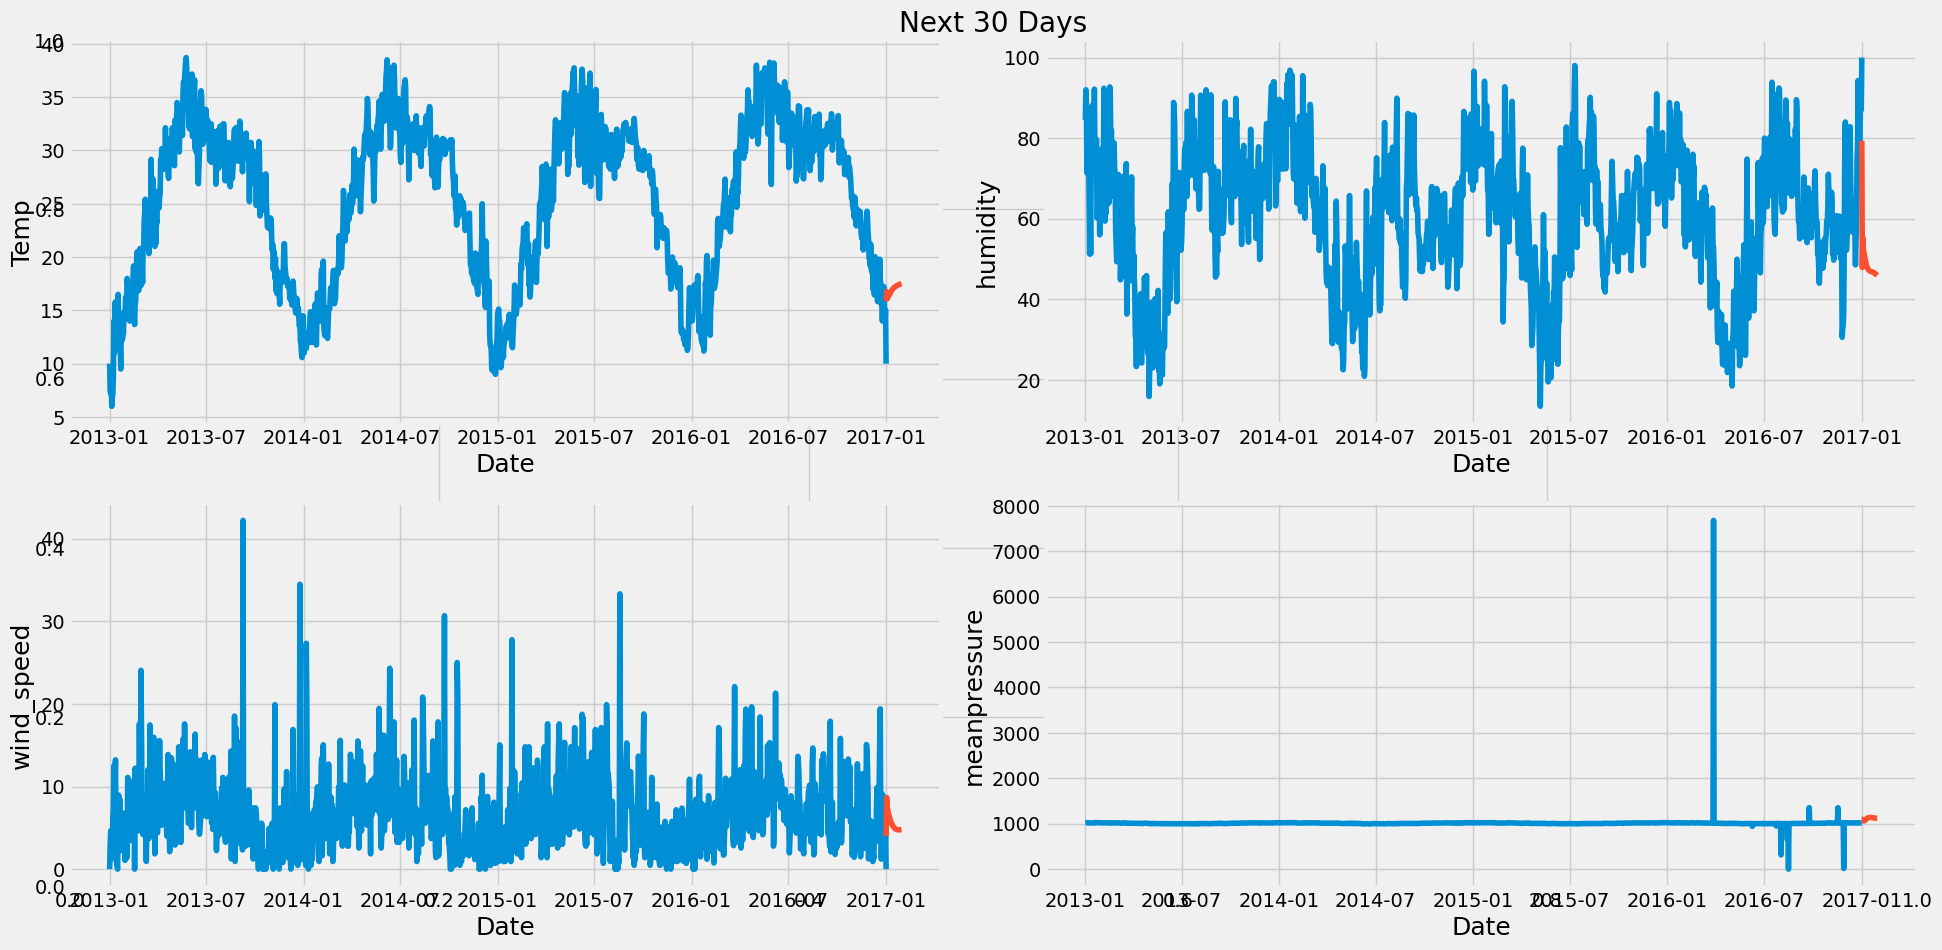

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Next 30 Days')

plt.subplot(2, 2, 1)
plt.plot(df['meantemp'])
plt.plot(df_result.set_index('Date')[['meantemp']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temp' ,fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(df['humidity'])
plt.plot(df_result.set_index('Date')[['humidity']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('humidity' ,fontsize=18)

plt.subplot(2, 2, 3)
plt.plot(df['wind_speed'])
plt.plot(df_result.set_index('Date')[['wind_speed']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('wind_speed' ,fontsize=18)

plt.subplot(2, 2, 4)
plt.plot(df['meanpressure'])
plt.plot(df_result.set_index('Date')[['meanpressure']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('meanpressure' ,fontsize=18)

plt.tight_layout()
plt.show()